In [ ]:
#! pip install pycaret

In [ ]:
# !pip install shap

In [ ]:
import pandas as pd


In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv

--2020-08-29 18:08:25--  https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12239 (12K) [application/x-httpd-php]
Saving to: ‘heart_failure_clinical_records_dataset.csv.5’

heart_failure_clini 100%[===================>]  11.95K  --.-KB/s    in 0s      

2020-08-29 18:08:26 (77.0 MB/s) - ‘heart_failure_clinical_records_dataset.csv.5’ saved [12239/12239]



In [ ]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [ ]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
data.shape

(299, 13)

In [ ]:
#missing values check
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
#rename a column
data.rename(columns={'DEATH_EVENT':'class'},inplace=True)

In [ ]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'class'],
      dtype='object')

In [ ]:
#descriptive stats
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,class
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
data['class'].value_counts()

0    203
1     96
Name: class, dtype: int64

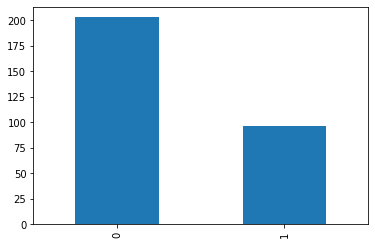

In [ ]:
data['class'].value_counts().plot(kind='bar')

In [ ]:
#Pycaret
import pycaret.classification

In [ ]:
#Methods
dir(pycaret.classification)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_create_bucket_gcp',
 '_create_container_azure',
 '_download_blob_azure',
 '_download_blob_gcp',
 '_upload_blob_azure',
 '_upload_blob_gcp',
 'automl',
 'blend_models',
 'calibrate_model',
 'compare_models',
 'create_model',
 'deploy_model',
 'ensemble_model',
 'evaluate_model',
 'finalize_model',
 'get_config',
 'get_logs',
 'get_system_logs',
 'interpret_model',
 'load_model',
 'models',
 'optimize_threshold',
 'plot_model',
 'predict_model',
 'pull',
 'save_model',
 'set_config',
 'setup',
 'stack_models',
 'tune_model']

In [ ]:
#Simplify 
import pycaret.classification as pc

In [ ]:
dir(pc)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_create_bucket_gcp',
 '_create_container_azure',
 '_download_blob_azure',
 '_download_blob_gcp',
 '_upload_blob_azure',
 '_upload_blob_gcp',
 'automl',
 'blend_models',
 'calibrate_model',
 'compare_models',
 'create_model',
 'deploy_model',
 'ensemble_model',
 'evaluate_model',
 'finalize_model',
 'get_config',
 'get_logs',
 'get_system_logs',
 'interpret_model',
 'load_model',
 'models',
 'optimize_threshold',
 'plot_model',
 'predict_model',
 'pull',
 'save_model',
 'set_config',
 'setup',
 'stack_models',
 'tune_model']

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode activated.


In [ ]:
abc = pc.setup(data=data,target='class',session_id=4512)
#press y for accepting at default

Setup Succesfully Completed!


,Description,Value
0,session_id,4512
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(299, 13)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
pc.models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process.GPC,False
mlp,MLP Classifier,sklearn.neural_network.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model.RidgeClassifier,True


In [ ]:
pc.models(type='ensemble').index.tolist()

['rf', 'ada', 'gbc', 'et', 'xgboost', 'lightgbm', 'catboost']

In [ ]:
#ignore a column 
# pc.setup(data=data,target='class',ignore_features=['age','diabetes'])

In [ ]:
#compare models - baseline
pc.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extreme Gradient Boosting,0.8519,0.9218,0.7429,0.8016,0.7552,0.6501,0.6643,0.0329
1,CatBoost Classifier,0.8426,0.9027,0.6881,0.8075,0.7292,0.6211,0.6361,1.4872
2,Random Forest Classifier,0.8421,0.9017,0.6119,0.8675,0.7061,0.6044,0.6297,0.1116
3,Light Gradient Boosting Machine,0.8279,0.8988,0.6714,0.7864,0.7017,0.5850,0.6052,0.0223
4,Logistic Regression,0.8276,0.8250,0.6738,0.8052,0.7162,0.5952,0.6154,0.0234
5,Gradient Boosting Classifier,0.8231,0.9047,0.6881,0.7725,0.7069,0.5834,0.6018,0.0906
6,Ridge Classifier,0.8181,0.0000,0.6833,0.7450,0.7062,0.5747,0.5818,0.0063
7,Ada Boost Classifier,0.8090,0.8569,0.6762,0.7220,0.6762,0.5475,0.5636,0.0830
8,Linear Discriminant Analysis,0.8086,0.8725,0.6381,0.7433,0.6737,0.5407,0.5542,0.0069
9,Extra Trees Classifier,0.7943,0.8498,0.5381,0.7742,0.6230,0.4890,0.5116,0.2489


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=4512,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)

In [ ]:
#blacklist algorithm
pc.compare_models(exclude=['svm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extreme Gradient Boosting,0.8519,0.9218,0.7429,0.8016,0.7552,0.6501,0.6643,0.0313
1,CatBoost Classifier,0.8426,0.9027,0.6881,0.8075,0.7292,0.6211,0.6361,1.4843
2,Random Forest Classifier,0.8421,0.9017,0.6119,0.8675,0.7061,0.6044,0.6297,0.1123
3,Light Gradient Boosting Machine,0.8279,0.8988,0.6714,0.7864,0.7017,0.5850,0.6052,0.0236
4,Logistic Regression,0.8276,0.8250,0.6738,0.8052,0.7162,0.5952,0.6154,0.0275
5,Gradient Boosting Classifier,0.8231,0.9047,0.6881,0.7725,0.7069,0.5834,0.6018,0.0913
6,Ridge Classifier,0.8181,0.0000,0.6833,0.7450,0.7062,0.5747,0.5818,0.0061
7,Ada Boost Classifier,0.8090,0.8569,0.6762,0.7220,0.6762,0.5475,0.5636,0.0846
8,Linear Discriminant Analysis,0.8086,0.8725,0.6381,0.7433,0.6737,0.5407,0.5542,0.0072
9,Extra Trees Classifier,0.7943,0.8498,0.5381,0.7742,0.6230,0.4890,0.5116,0.2482


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=4512,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)

In [ ]:
ensembled_models = pc.compare_models(include = pc.models(type='ensemble').index.tolist(), fold = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Gradient Boosting Classifier,0.8566,0.8938,0.7312,0.8115,0.7673,0.6641,0.6678,0.0837
1,Extreme Gradient Boosting,0.8424,0.8935,0.6871,0.7947,0.7367,0.6251,0.6287,0.0271
2,CatBoost Classifier,0.8423,0.8949,0.6581,0.8134,0.7254,0.6173,0.6255,1.3960
3,Random Forest Classifier,0.8375,0.9025,0.5672,0.8875,0.6902,0.5873,0.6153,0.1112
4,Ada Boost Classifier,0.8184,0.8537,0.6271,0.7706,0.6903,0.5635,0.5705,0.0805
5,Light Gradient Boosting Machine,0.8183,0.8733,0.6126,0.7747,0.6828,0.5583,0.5668,0.0173
6,Extra Trees Classifier,0.7751,0.8641,0.4170,0.7786,0.5413,0.4103,0.4461,0.2469


In [ ]:
# create a model - catboost
rf_model = pc.create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7619,0.8000,0.5000,0.6000,0.5455,0.3860,0.3889
1,0.9048,0.9111,0.6667,1.0000,0.8000,0.7407,0.7670
2,0.8571,0.9388,0.5714,1.0000,0.7273,0.6400,0.6860
3,0.8571,0.8878,0.5714,1.0000,0.7273,0.6400,0.6860
4,0.7143,0.8214,0.4286,0.6000,0.5000,0.3077,0.3162
5,0.9524,0.9592,1.0000,0.8750,0.9333,0.8966,0.9014
6,0.8095,0.9031,0.5714,0.8000,0.6667,0.5385,0.5534
7,0.9048,0.8980,0.7143,1.0000,0.8333,0.7692,0.7906
8,0.8095,0.9694,0.4286,1.0000,0.6000,0.5000,0.5774
9,0.8500,0.9286,0.6667,0.8000,0.7273,0.6250,0.6299


In [ ]:
#tune a model
tune_rf_model = pc.tune_model(rf_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7143,0.8111,0.5000,0.5000,0.5000,0.3000,0.3000
1,0.9048,0.9444,0.6667,1.0000,0.8000,0.7407,0.7670
2,0.8571,0.9898,0.5714,1.0000,0.7273,0.6400,0.6860
3,0.8095,0.8673,0.4286,1.0000,0.6000,0.5000,0.5774
4,0.7619,0.8469,0.4286,0.7500,0.5455,0.4000,0.4287
5,0.9524,0.9694,1.0000,0.8750,0.9333,0.8966,0.9014
6,0.8571,0.8776,0.7143,0.8333,0.7692,0.6667,0.6708
7,0.9524,0.8776,0.8571,1.0000,0.9231,0.8889,0.8944
8,0.8095,0.9286,0.4286,1.0000,0.6000,0.5000,0.5774
9,0.9000,0.9762,1.0000,0.7500,0.8571,0.7826,0.8018


In [ ]:
#create a model - xgboost
xb_model = pc.create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7143,0.8222,0.5000,0.5000,0.5000,0.3000,0.3000
1,0.8571,0.9778,0.5000,1.0000,0.6667,0.5882,0.6455
2,0.8571,0.9082,0.8571,0.7500,0.8000,0.6897,0.6934
3,0.8095,0.9592,0.7143,0.7143,0.7143,0.5714,0.5714
4,0.7619,0.8776,0.5714,0.6667,0.6154,0.4444,0.4472
5,0.9048,0.9898,1.0000,0.7778,0.8750,0.8000,0.8165
6,0.9048,0.8980,0.7143,1.0000,0.8333,0.7692,0.7906
7,0.9048,0.9184,0.8571,0.8571,0.8571,0.7857,0.7857
8,0.9048,0.8673,0.7143,1.0000,0.8333,0.7692,0.7906
9,0.9000,1.0000,1.0000,0.7500,0.8571,0.7826,0.8018


In [ ]:
#tune a model
tune_xb_model = pc.tune_model(xb_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7143,0.8778,0.5000,0.5000,0.5000,0.3000,0.3000
1,0.9048,0.9444,0.6667,1.0000,0.8000,0.7407,0.7670
2,0.8571,0.9184,0.7143,0.8333,0.7692,0.6667,0.6708
3,0.8095,0.9082,0.5714,0.8000,0.6667,0.5385,0.5534
4,0.7619,0.8673,0.5714,0.6667,0.6154,0.4444,0.4472
5,0.9524,0.9490,1.0000,0.8750,0.9333,0.8966,0.9014
6,0.9048,0.7755,0.7143,1.0000,0.8333,0.7692,0.7906
7,0.9048,0.9082,0.8571,0.8571,0.8571,0.7857,0.7857
8,0.8095,0.7857,0.4286,1.0000,0.6000,0.5000,0.5774
9,0.9000,1.0000,1.0000,0.7500,0.8571,0.7826,0.8018


In [ ]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 4512,
 'verbose': 0,
 'warm_start': False}

In [ ]:
tune_rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 90,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 4512,
 'verbose': 0,
 'warm_start': False}

In [ ]:
xb_model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 4512,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 0}

In [ ]:
tune_xb_model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.9,
 'gamma': 0,
 'learning_rate': 0.06,
 'max_delta_step': 0,
 'max_depth': 90,
 'min_child_weight': 4,
 'missing': None,
 'n_estimators': 900,
 'n_jobs': -1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 4512,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 0.7,
 'verbosity': 0}

In [ ]:
# Evaluation of models - tuned xgb
pc.evaluate_model(tune_xb_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
# Evaluation of models - tuned rf
pc.evaluate_model(tune_rf_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

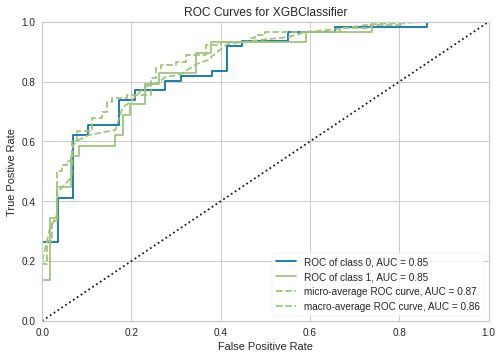

In [ ]:
#plot performance model
pc.plot_model(tune_xb_model)

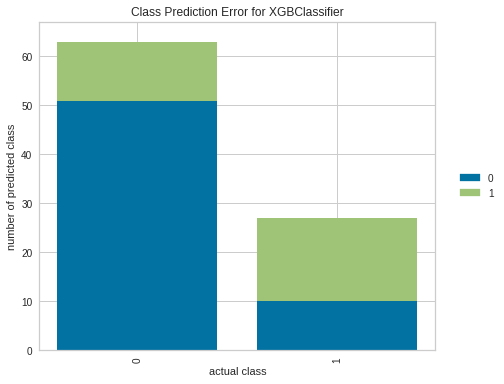

In [ ]:
#plot prediction error of model
pc.plot_model(tune_xb_model,plot = 'error')


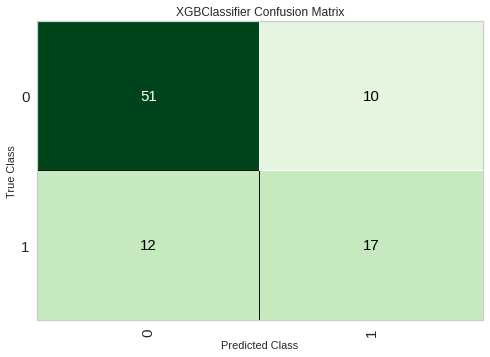

In [ ]:
#plot confusion matrix
pc.plot_model(tune_xb_model, plot = 'confusion_matrix' )

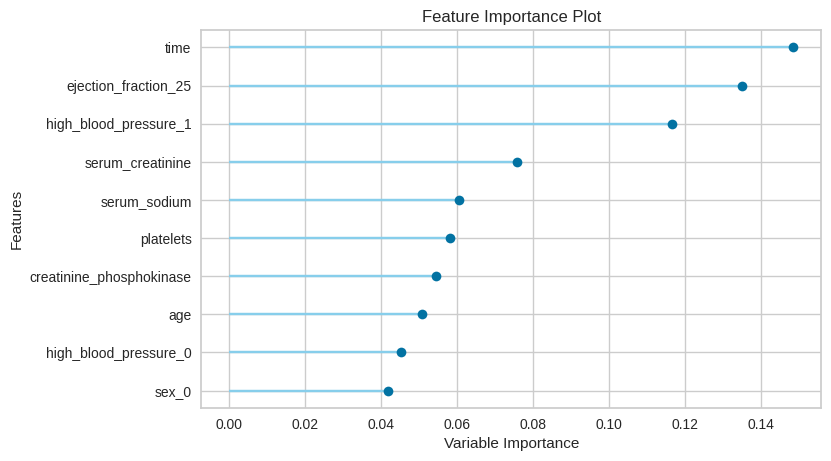

In [ ]:
# Feature importance
pc.plot_model(tune_xb_model,plot='feature')

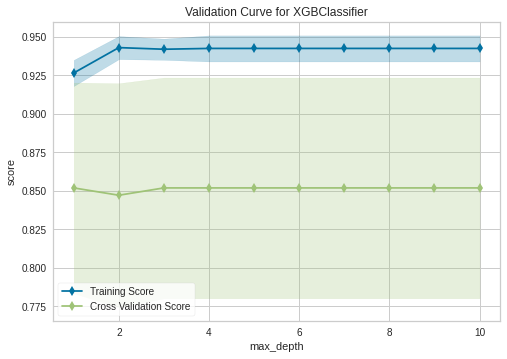

In [ ]:
#validation curve
pc.plot_model(tune_xb_model,plot='vc')

In [ ]:
# optmize threshold for trained model
pc.optimize_threshold(tune_xb_model, true_negative=1500,false_negative=-5000)

Optimized Probability Threshold: 0.1 | Optimized Cost Function: 47000


In [ ]:
#save model
# pc.save_model(tune_xb_model,'xgb_saved_model_29082020')

Transformation Pipeline and Model Succesfully Saved


In [ ]:
#loading the saved model
load_model = pc.load_model('xgb_saved_model_29082020')

Transformation Pipeline and Model Successfully Loaded


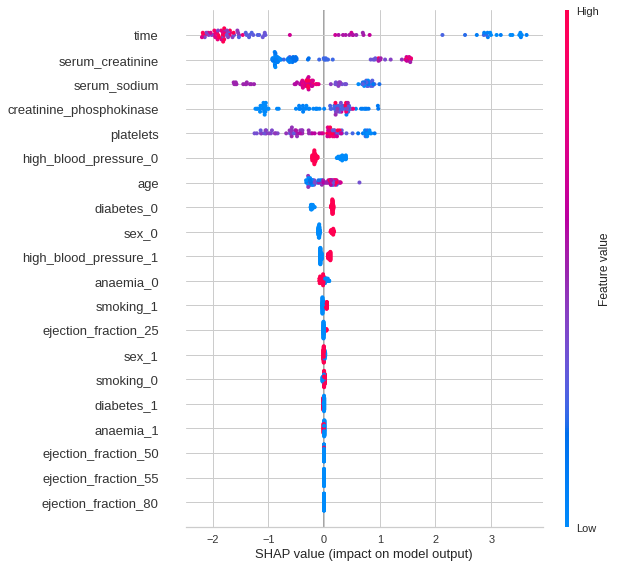

In [ ]:
#interpret model for prediction
pc.interpret_model(tune_xb_model)

In [ ]:
# finalize model for prediction
final_xgb = pc.finalize_model(tune_xb_model)

In [ ]:
# predict with model
# prediction = pc.predict_model(final_xgb,data=)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9667,0.996,0.9655,0.9333,0.9492,0.9244,0.9247
